---
## **Visualization Datasets Data**
---

<font size="2">Eudald Sangenis  
Creation: 7/29/2022  
Last Update: 7/29/2022  

The objective of this file is to visualize the raw data from the foot-mounted IMU datasets.

Take a look at the right and left side stepping to see if some datasets have to be changed.</font>

In [ ]:
# data = '2022_03_17' # Subject I - Chico
# data = '2022_07_27' # Subject II - Eudald
data = '2022_08_01' # Subject III - Austin

## Libraries:

In [73]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [74]:
import signal_processing_functions as sp

## Visualization:

In [75]:
current_directory = os.getcwd()
print("Current directory: " + current_directory)

# Define a list of experiment names and corresponding speeds
experiment_names = [
    ('exp100_VN', 'Test dataset: walk 60 steps/s'),
    ('exp200_VN', 'Train dataset: walk 60 steps/s'),
    ('exp300_VN', 'Test dataset: walk 90 steps/s'),
    ('exp400_VN', 'Train dataset: walk 90 steps/s'),
    ('exp500_VN', 'Test dataset: jog 120 steps/s'),
    ('exp600_VN', 'Train dataset: jog 120 steps/s'),
    ('exp700_VN', 'Test dataset: run 150 steps/s'),
    ('exp800_VN', 'Train dataset: run 150 steps/s'),
    ('exp900_VN', 'Test dataset: sprint 180 steps/s'),
    ('exp1000_VN', 'Train dataset: sprint 180 steps/s'),
    ('exp1100_VN', 'Test dataset: walk backward 60 steps/s'),
    ('exp1200_VN', 'Train dataset: walk backward 60 steps/s'),
    ('exp1300_VN', 'Test dataset: jog backward 90 steps/s'),
    ('exp1400_VN', 'Train dataset: jog backward 90 steps/s'),
    ('exp1500_VN', 'Test dataset: side step right 90 steps/s'),
    ('exp1600_VN', 'Train dataset: side step right 90 steps/s'),
    ('exp1700_VN', 'Test dataset: side step right 90 steps/s'),
    ('exp1800_VN', 'Train dataset: side step right 90 steps/s')
]

data_folder = os.path.join(current_directory, '1_unlabeled_datasets', data)
exp_df_lst = [sp.mat2pandas(data_folder + os.sep, exp_name) for exp_name, _ in experiment_names]

# Assign datasets to variables for easy access
exp_100_df, exp_200_df = exp_df_lst[0], exp_df_lst[1]
exp_300_df, exp_400_df = exp_df_lst[2], exp_df_lst[3]
exp_500_df, exp_600_df = exp_df_lst[4], exp_df_lst[5]
exp_700_df, exp_800_df = exp_df_lst[6], exp_df_lst[7]
exp_900_df, exp_1000_df = exp_df_lst[8], exp_df_lst[9]
exp_1100_df, exp_1200_df = exp_df_lst[10], exp_df_lst[11]
exp_1300_df, exp_1400_df = exp_df_lst[12], exp_df_lst[13]
exp_1500_df, exp_1600_df = exp_df_lst[14], exp_df_lst[15]
exp_1700_df, exp_1800_df = exp_df_lst[16], exp_df_lst[17]

Current directory: c:\Users\Eudald\OneDrive - personalmicrosoftsoftware.uci.edu\NEVERLOST\01_Quarterly_Reports_&_publications\2024 IEEE JSPIN - SVM Journal\Motion Classification


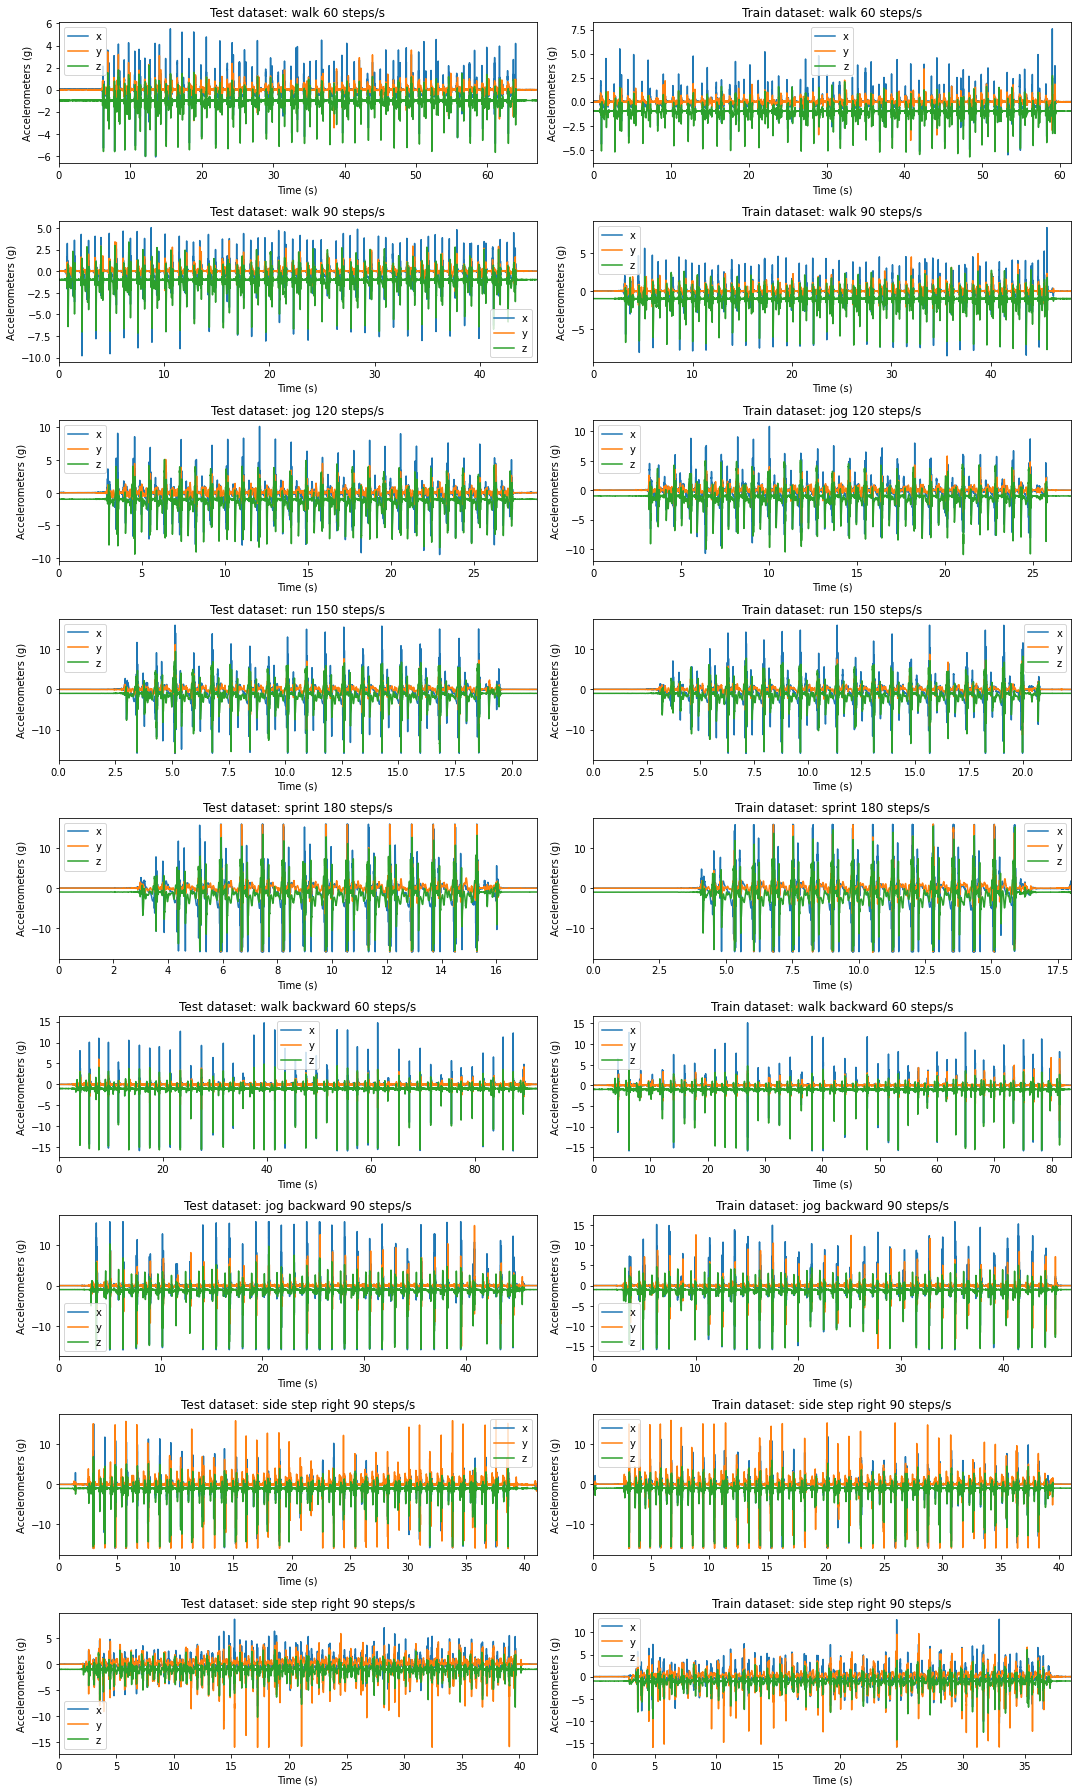

In [76]:
# Assuming exp_df_lst and experiment_names are defined as previously shown
sampling_frequency = 800  # in Hz

# Determine the grid size
num_experiments = len(exp_df_lst)
num_rows = 9
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))
axes = axes.flatten()  # Flatten the 2D array of axes to a 1D array for easier iteration

# Plot each dataset
for i, (df, (exp_name, exp_description)) in enumerate(zip(exp_df_lst, experiment_names)):
    num_samples = df.shape[0]
    time = np.arange(num_samples) / sampling_frequency

    axes[i].plot(time, df.iloc[:, 1], label='x')
    axes[i].plot(time, df.iloc[:, 2], label='y')
    axes[i].plot(time, df.iloc[:, 3], label='z')

    # Calculate the maximum timestamp across all datasets
    max_timestamp = max(time)

    axes[i].set_xlim(0, max_timestamp)  # Set x-axis limits
    axes[i].set_title(exp_description)
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Accelerometers (g)")
    axes[i].legend(["x", "y", "z"])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

---
### **<font size="5">Example Right side stepping:</font>**
---

<img src="Images/right_side_stepping.png">

#### Dataset 15 & 16

<AxesSubplot:>

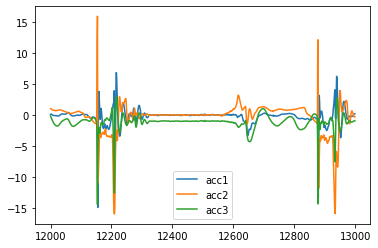

In [77]:
exp_1500_df.iloc[12000:13000,1:4].plot() # side left

<AxesSubplot:>

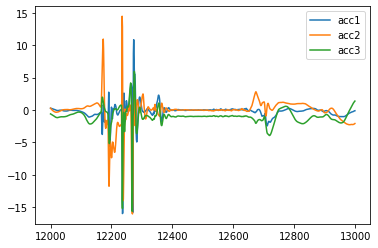

In [78]:
exp_1600_df.iloc[12000:13000,1:4].plot() # side right

---
### **<font size="5">Example Left side stepping:</font>**
---

<img src="Images/left_side_stepping.png">

#### Dataset 17 & 18

<AxesSubplot:>

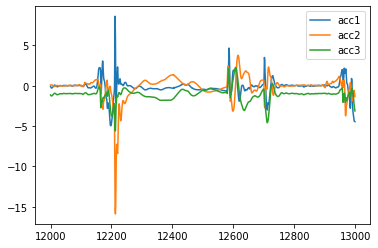

In [79]:
exp_1700_df.iloc[12000:13000,1:4].plot() # side right

<AxesSubplot:>

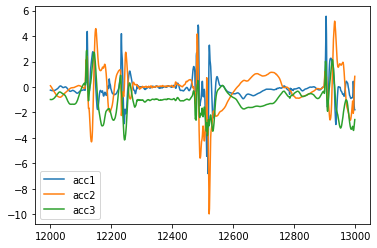

In [80]:
exp_1800_df.iloc[12000:13000,1:4].plot() # side left